# importing libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns

# Loading data

In [2]:
df = pd.read_csv('DataAnalyst.csv')

In [78]:
df.head(2)

,Job Title,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,minimal_salary,maximal_salary,average_salary,python,sql,power bi,excel,tableau
0,"Data Analyst, Center on Immigration and Justic...",3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,37.0,66.0,51.5,True,True,False,False,False
1,Quality Data Analyst,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,37.0,66.0,51.5,False,True,False,True,False


In [4]:
df.shape

(2253, 16)

In [5]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

In [6]:
df.nunique()

Unnamed: 0           2253
Job Title            1272
Salary Estimate        90
Job Description      2253
Rating                 37
Company Name         1513
Location              253
Headquarters          483
Size                    9
Founded               161
Type of ownership      15
Industry               89
Sector                 25
Revenue                14
Competitors           291
Easy Apply              2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [10]:
df.describe(include='object').T

,count,unique,top,freq
Job Title,2253,1272,Data Analyst,405
Salary Estimate,2253,90,$42K-$76K (Glassdoor est.),57
Job Description,2253,2253,Are you eager to roll up your sleeves and harn...,1
Company Name,2252,1513,"Staffigo Technical Services, LLC\n5.0",58
Location,2253,253,"New York, NY",310
Headquarters,2253,483,"New York, NY",206
Size,2253,9,51 to 200 employees,421
Type of ownership,2253,15,Company - Private,1273
Industry,2253,89,-1,353
Sector,2253,25,Information Technology,570


In [12]:
df.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

# preprocessing

In [14]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [15]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [16]:
df.replace("-1", np.nan, inplace=True)
df.replace(-1, np.nan, inplace=True)
df.replace(-1.0, np.nan, inplace=True)

In [22]:
df.isnull().sum()

Job Title               0
Salary Estimate         1
Job Description         0
Rating                272
Company Name            0
Location                0
Headquarters          172
Size                  163
Founded               660
Type of ownership     163
Industry              353
Sector                353
Revenue               163
Competitors          1732
Easy Apply           2173
dtype: int64

In [18]:
df['Company Name'] = df["Company Name"].apply(lambda x: str(x)[:-4])

In [19]:
df['Company Name']

0                Vera Institute of Justice
1       Visiting Nurse Service of New York
2                              Squarespace
3                                 Celerity
4                                  FanDuel
                       ...                
2248                         Avacend, Inc.
2249                     Arrow Electronics
2250                                  Spic
2251           Contingent Network Services
2252                            SCL Health
Name: Company Name, Length: 2253, dtype: object

In [23]:
df['Salary Estimate'].isnull().sum()

1

In [24]:
df[df['Salary Estimate'].isnull()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
2149,Configuration/Data Management Analyst III,NaN,Job Description\nPosition Title: Configuration...,4.4,Protingent,"Kent, WA","Bellevue, WA",51 to 200 employees,2001.0,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),NaN,NaN


In [25]:
df.drop(index = 2149, inplace=True)

In [28]:
df['Salary Estimate']

0        $37K-$66K (Glassdoor est.)
1        $37K-$66K (Glassdoor est.)
2        $37K-$66K (Glassdoor est.)
3        $37K-$66K (Glassdoor est.)
4        $37K-$66K (Glassdoor est.)
                   ...             
2248    $78K-$104K (Glassdoor est.)
2249    $78K-$104K (Glassdoor est.)
2250    $78K-$104K (Glassdoor est.)
2251    $78K-$104K (Glassdoor est.)
2252    $78K-$104K (Glassdoor est.)
Name: Salary Estimate, Length: 2252, dtype: object

In [41]:
df['minimal_salary'] = df['Salary Estimate'].str[1:3].str.strip().astype('float')
df['maximal_salary'] = df['Salary Estimate'].str[6:10].str.replace('K','').str.lstrip('$').str.strip().astype('float')
df['average_salary'] = (df['minimal_salary'] + df['maximal_salary']) / 2

In [42]:
df['Job Description'].isnull().sum()

0

In [ ]:
df['Job Description'].unique()

In [44]:
options = ['python', 'sql', 'power bi', 'excel', 'tableau']

for option in options:
    df[option] = df['Job Description'].apply(lambda text: option in text.lower())

In [45]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Competitors,Easy Apply,minimal_salary,maximal_salary,average_salary,python,sql,power bi,excel,tableau
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,...,NaN,True,37.0,66.0,51.5,True,True,False,False,False
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893.0,Nonprofit Organization,...,NaN,NaN,37.0,66.0,51.5,False,True,False,True,False
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003.0,Company - Private,...,GoDaddy,NaN,37.0,66.0,51.5,True,True,False,True,True
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002.0,Subsidiary or Business Segment,...,NaN,NaN,37.0,66.0,51.5,False,True,False,False,True
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,...,DraftKings,True,37.0,66.0,51.5,True,True,False,True,False


In [46]:
df['Rating'].value_counts().head()

3.9    140
3.6    135
3.7    132
5.0    131
3.8    130
Name: Rating, dtype: int64

In [47]:
df['Rating'].isnull().sum()

272

In [49]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'minimal_salary', 'maximal_salary', 'average_salary',
       'python', 'sql', 'power bi', 'excel', 'tableau'],
      dtype='object')

# Data Visualization

In [54]:
df.drop(['Salary Estimate', 'Job Description','Easy Apply'],axis=1,inplace=True)

In [75]:
df.to_csv('data.csv')

Minimal Salary

In [55]:
fig = px.histogram(df, x='minimal_salary', marginal='box', 
                   color_discrete_sequence=['#330C73'])
fig.update_layout(
    height=600, width=800, title_text='Minimal Salary',
    xaxis_title='salaries', yaxis_title="count", title_x = 0.5,
    font=dict(
            family="Courier New, monospace",
            size=18,
            color="black"        
))

Maximal Salary

In [57]:
fig = px.histogram(df, x='maximal_salary', marginal='box', 
                   color_discrete_sequence=['#330C73'])

fig.update_layout(
    
    height=600, width=800, title_text='Maximal Salary',
    
    xaxis_title='salaries', yaxis_title="count", title_x = 0.5,
    
    font=dict(
            family="Courier New, monospace",
            size=18,
            color="black"
        
))

Average Salary

In [59]:
fig = px.histogram(df, x='average_salary', marginal='box', 
                   color_discrete_sequence=['#330C73'])

fig.update_layout(
    
    height=600, width=800, title_text='Average Salary',
    
    xaxis_title='salaries', yaxis_title="count", title_x = 0.5,
    
    font=dict(
            family="Courier New, monospace",
            size=18,
            color="black"
        
))

Job titles and count of job openings

In [62]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df['Job Title'].value_counts().head(20).index,
       y=df['Job Title'].value_counts().head(20).values,
       marker_color = '#330C73'))

fig.update_layout(
    
    height=600, width=800, title_text='Number of job openings by Job Titles',
    
    xaxis_title='job title', yaxis_title="count", title_x = 0.5,
    
    font=dict(
            family="Courier New, monospace",
            size=14,
            color="black"
        
))

In [64]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df['Industry'].value_counts().head(20).index,
       y=df['Industry'].value_counts().head(20).values,
       marker_color = '#330C73'))

fig.update_layout(
    
    height=600, width=800, title_text='Number of job openings by Industry',
    
    xaxis_title='job title', yaxis_title="count", title_x = 0.5,
    
    font=dict(
            family="Courier New, monospace",
            size=10,
            color="black"
        
))

In [65]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df['Sector'].value_counts().head(20).index,
       y=df['Sector'].value_counts().head(20).values,
       marker_color = '#330C73'))

fig.update_layout(
    
    height=600, width=800, title_text='Number of job openings by Sector',
    
    xaxis_title='job title', yaxis_title="count", title_x = 0.5,
    
    font=dict(
            family="Courier New, monospace",
            size=12,
            color="black"
        
))

Job opening by job title wrt technologies

In [66]:
df_copy = df[['Job Title','python', 'sql','excel','tableau', 'power bi']].copy()
technology = df_copy.groupby('Job Title')[['python', 'sql','excel','tableau', 'power bi']].sum().sort_values(by='python', ascending=False).head(10)
df_technology = pd.DataFrame(technology)
df_technology.reset_index(inplace=True)
df_technology['number_of_job_openings'] = df['Job Title'].value_counts()[:10].values
df_technology

,Job Title,python,sql,excel,tableau,power bi,number_of_job_openings
0,Data Analyst,125,301,239,110,39,405
1,Senior Data Analyst,54,79,54,45,12,90
2,Business Data Analyst,11,21,17,11,3,30
3,Sr. Data Analyst,8,18,7,13,4,28
4,Sr Data Analyst,6,7,5,6,1,21
5,Data Analyst III (Healthcare Analytics),5,5,5,5,0,17
6,Lead Data Analyst,5,13,7,10,6,17
7,NY Healthcare Data/Reporting Analyst,5,5,5,5,0,17
8,Marketing Data Analyst,5,9,6,5,0,16
9,Data Science Analyst,4,4,2,2,0,15


In [67]:
fig = px.bar(df_technology, x='Job Title', y=['python', 'sql', 'excel', 'tableau',
                                             'power bi'],
            color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(
    
    height=600, width=800, title_text='Number of job openings by Job Title with technologies',
    xaxis_title='job title', yaxis_title="count",
    legend_title='technologies',
    
    font=dict(
            family="Courier New, monospace",
            size=14,
            color="black"
        
))

Jobs salary based on company name with rating scores

In [69]:
fig = px.scatter(df, y='Company Name', x='minimal_salary', color = 'Rating',
                 color_continuous_scale=px.colors.sequential.Bluered_r)

fig.update_layout(
    
    height=600, width=800, title_text='Minimal salary and company names with rating scores',
    
    xaxis_title='salary', yaxis_title='Company Name', title_x = 0.5,
    
    font=dict(
            family="Courier New, monospace",
            size=12,
            color="black"
        
))

In [71]:
fig = px.scatter(df, y='Company Name', x='maximal_salary', color = 'Rating',
                 color_continuous_scale=px.colors.sequential.Bluered_r)

fig.update_layout(
    
    height=600, width=800, title_text='Maximal salary and company names with rating scores',
    
    xaxis_title='salary', yaxis_title='Company Name', title_x = 0.5,
    
    font=dict(
            family="Courier New, monospace",
            size=12,
            color="black"
        
))

fig.show()

In [73]:
fig = px.scatter(df, y='Company Name', x='average_salary', color = 'Rating',
                 color_continuous_scale=px.colors.sequential.Bluered_r)

fig.update_layout(
    
    height=600, width=800, title_text='Average salary and company names with rating scores',
    
    xaxis_title='salary', yaxis_title='Company Name', title_x = 0.5,
    
    font=dict(
            family="Courier New, monospace",
            size=12,
            color="black"
        
))

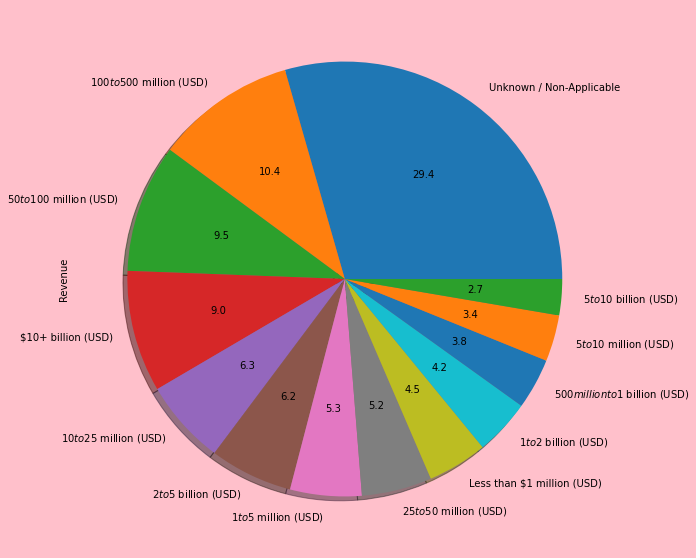

In [87]:
fig, ax = plt.subplots(facecolor='pink', figsize=(15,10))
df['Revenue'].value_counts().plot(kind='pie',
                                    autopct='%.1f',
                                    shadow=True)
plt.show()

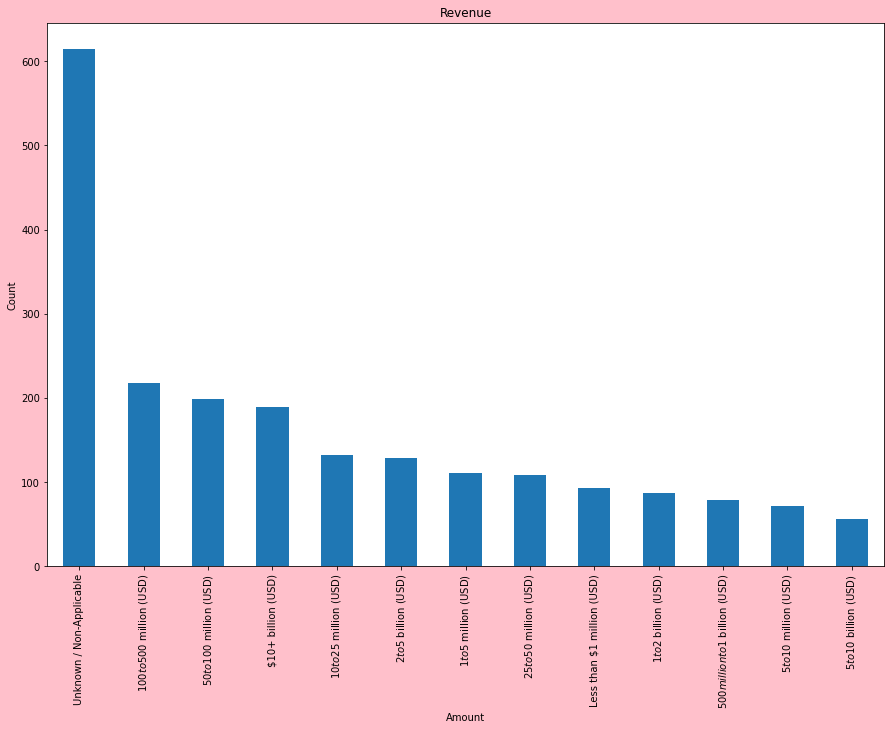

In [95]:
fig, ax = plt.subplots(facecolor='pink', figsize=(15,10))
plt.title('Revenue')
plt.xlabel('Amount')
plt.ylabel('Count')
df['Revenue'].value_counts().plot(kind='bar')
plt.show()

In [90]:
df['Type of ownership'].unique()

array(['Nonprofit Organization', 'Company - Private',
       'Subsidiary or Business Segment', 'Company - Public', 'Hospital',
       'Unknown', 'Contract', nan, 'Government',
       'School / School District', 'Other Organization',
       'College / University', 'Self-employed', 'Private Practice / Firm',
       'Franchise'], dtype=object)

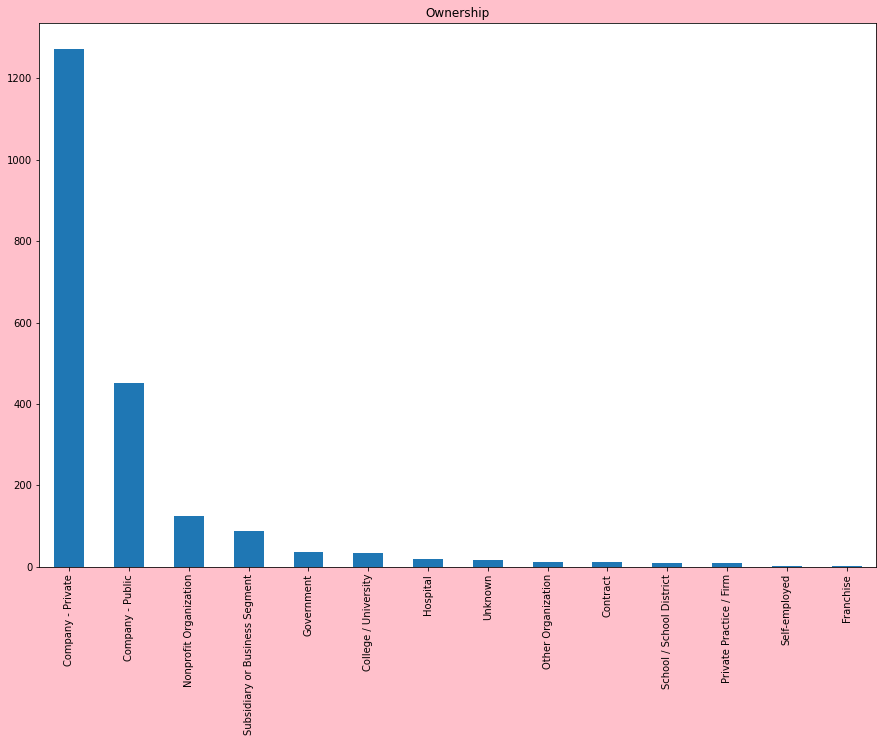

In [93]:
fig, ax = plt.subplots(facecolor='pink', figsize=(15,10))
plt.title('Ownership')
df['Type of ownership'].value_counts().plot(kind='bar')
plt.show()

In [96]:
df.columns

Index(['Job Title', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'minimal_salary', 'maximal_salary', 'average_salary',
       'python', 'sql', 'power bi', 'excel', 'tableau'],
      dtype='object')

In [114]:
df['Location'].nunique()

253

,Jobs
Location,
"Addison, TX",1
"Alachua, FL",1
"Alameda, CA",1
"Alhambra, CA",2
"Allegheny West, PA",2


In [120]:
location = df.groupby("Location").count()
location[["Job Title"]].sort_values(by = "Job Title", ascending = False)

less_than_10_jobs = location.loc[location["Job Title"] <= 10]
less_than_10_jobs = less_than_10_jobs[["Job Title"]]
less_than_10_jobs.rename(columns = {"Job Title":"Jobs"}, inplace = True)
less_than_10_jobs[:5]

more_than_10_jobs = location.loc[location["Job Title"] > 10]
more_than_10_jobs = more_than_10_jobs[["Job Title"]]
more_than_10_jobs.rename(columns = {"Job Title":"Jobs"}, inplace = True)

jobs = more_than_10_jobs["Jobs"].tolist()
locations = more_than_10_jobs.index.tolist()
locations_df = pd.DataFrame()
locations_df["location"] = locations
locations_df["jobs"] = jobs

new_row = {'location': "Other", "jobs":int(less_than_10_jobs.count())}
locations_df = locations_df.append(new_row, ignore_index=True)
locations_df[-5:]

,location,jobs
38,"Seattle, WA",30
39,"Sunnyvale, CA",16
40,"Tempe, AZ",31
41,"Wilmington, DE",11
42,Other,211


In [123]:
locations_df.to_csv('loc.csv')

Text(0, 0.5, 'Number of jobs')

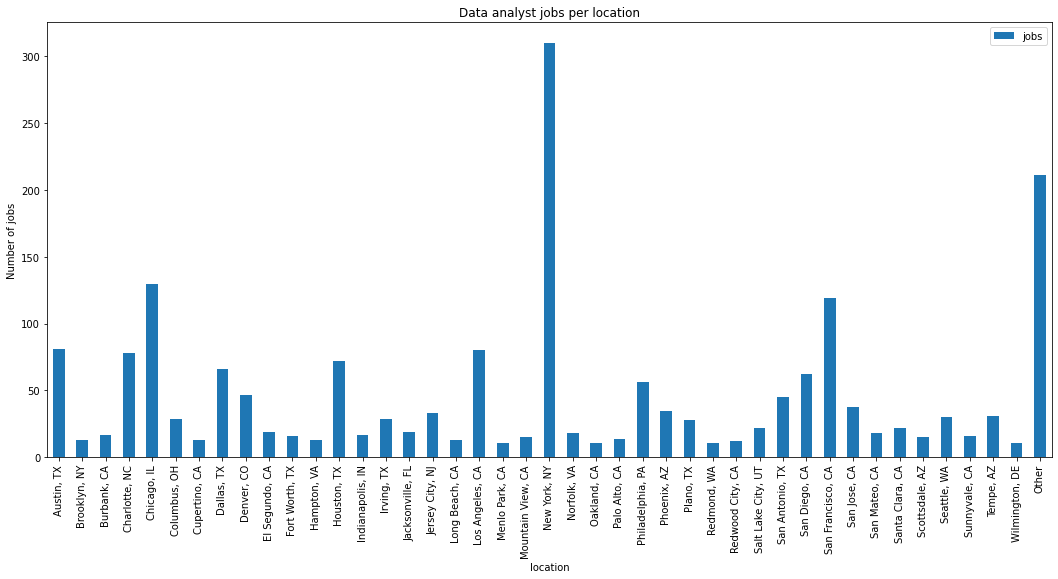

In [122]:
locations_df.plot(figsize = (18, 8), kind = "bar", x = "location", y = "jobs")
plt.title("Data analyst jobs per location")
plt.ylabel("Number of jobs")

Text(0, 0.5, 'Number of jobs')

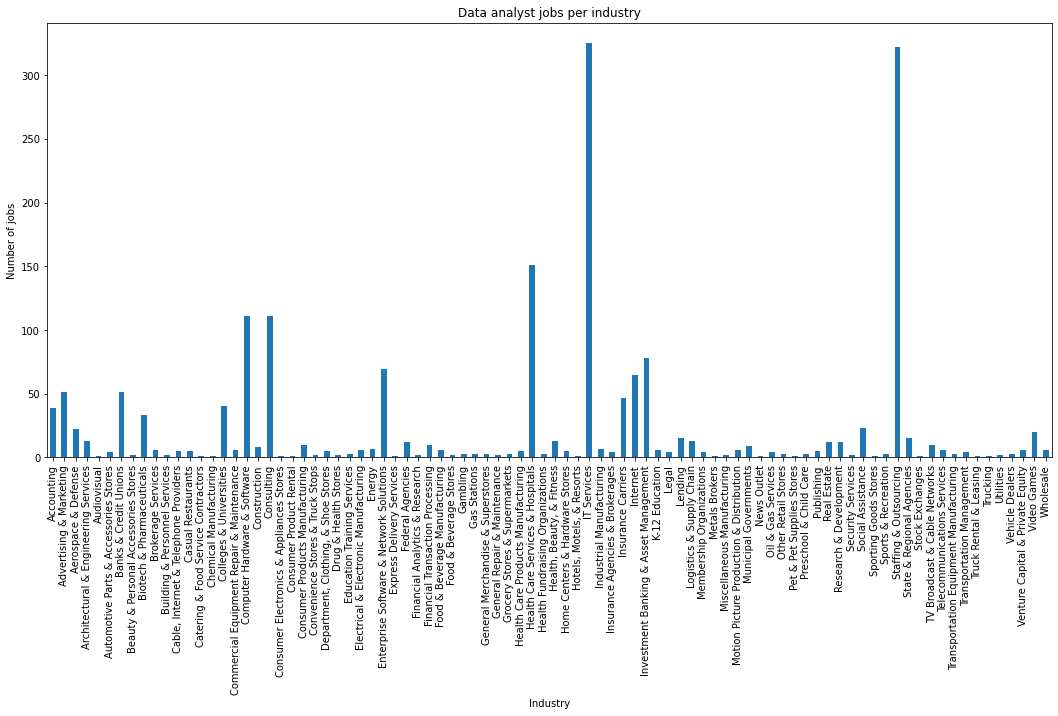

In [125]:
industry = df.groupby("Industry").count()
industry = industry["Job Title"]
industry.plot(figsize = (18,8), kind = "bar")
plt.title("Data analyst jobs per industry")
plt.ylabel("Number of jobs")

Text(0, 0.5, 'Number of jobs')

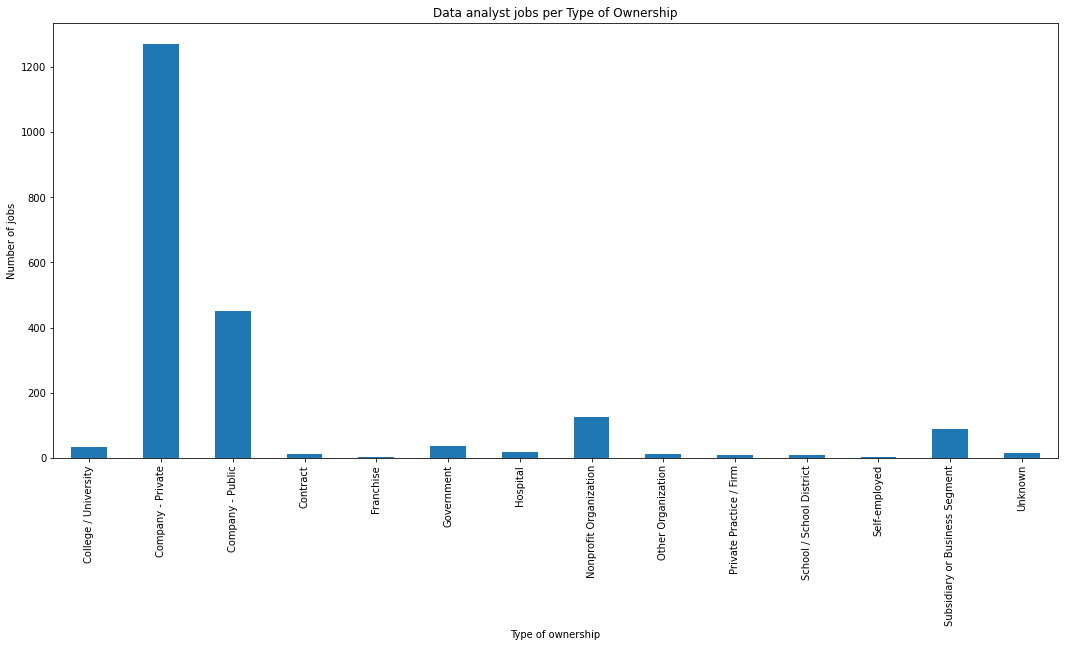

In [126]:
ownership = df.groupby("Type of ownership").count()
ownership = ownership["Job Title"]
ownership.plot(figsize = (18,8), kind = "bar")
plt.title("Data analyst jobs per Type of Ownership")
plt.ylabel("Number of jobs")

Text(0, 0.5, 'Number of jobs')

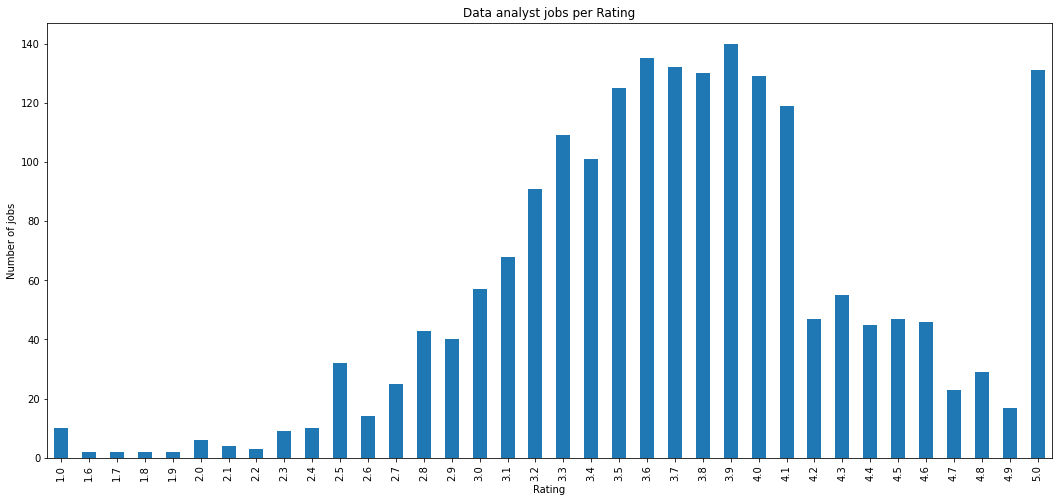

In [127]:
rating = df.groupby("Rating").count()
rating = rating["Job Title"]
rating.plot(figsize = (18,8), kind = "bar")
plt.title("Data analyst jobs per Rating")
plt.ylabel("Number of jobs")

Text(0.5, 1.0, 'Companies with most job offers')

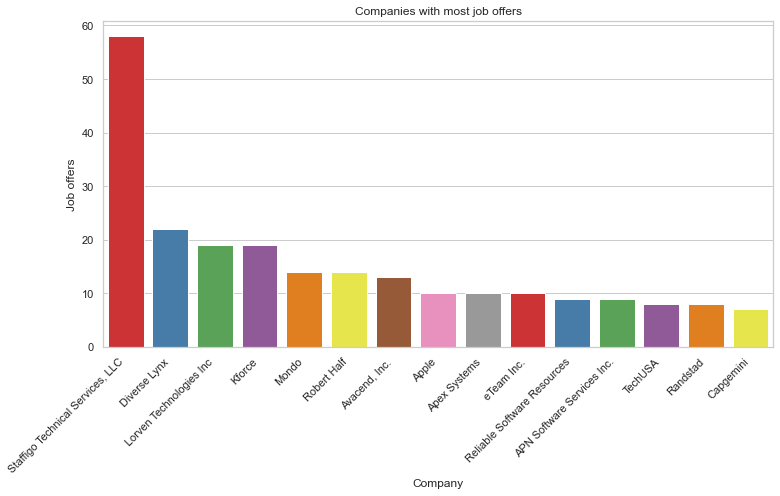

In [129]:
df_comp = df.groupby(['Company Name']).count()[['Job Title']]
df_comp = df_comp.sort_values('Job Title', ascending=False)[:15]
plt.figure(figsize=(12,6))
sns.set(style="whitegrid")
ax = sns.barplot(x=df_comp.index, y=df_comp["Job Title"],palette='Set1')
ax.set(xlabel='Company', ylabel='Job offers')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.title('Companies with most job offers')

ValueError: Could not interpret input 'Salary_avg'

<Figure size 432x288 with 0 Axes>